The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DAG Summary:
  Total nodes: 5
  W_L nodes (2): L0, L1
  W_R nodes (3): R0, R1, R2
  Edges (5):
    L0 -> L1
    L0 -> R1
    L1 -> R0
    L1 -> R1
    R1 -> R2


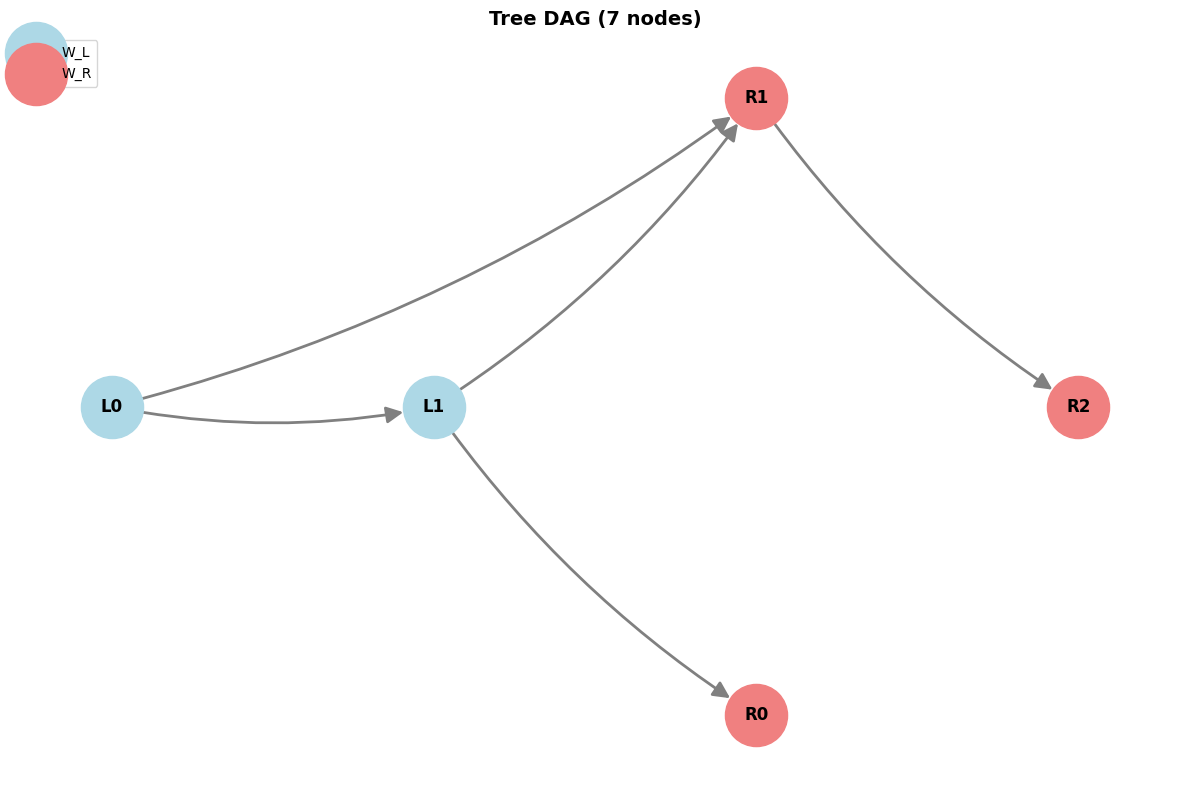

VALIDATING CONSTRAINTS FOR DAG
Nodes in W_L: L0, L1
Nodes in W_R: R0, R1, R2
Edges: L0->L1, L0->R1, L1->R0, L1->R1, R1->R2

GENERATED CONSTRAINTS
CONSTRAINT SYSTEM FROM ALGORITHM 1

                             Algorithm 1 Variables                              
--------------------------------------------------------------------------------
  ℵᴿ (aleph_R):    256  (number of response type combinations)
  B           :     32  (number of (W_L, W_R) configurations)
  dim(q)      :    256  (decision variable has 256 components)
  dim(p*)     :     32  (joint probability vector)
  |W_L configs|:      4  (number of distinct W_L configurations)
  dim(p|W_L)  :      8  (conditional prob. vector per W_L config)

                               Matrix Dimensions                                
--------------------------------------------------------------------------------
  P matrix    :   32 × 256   (Algorithm 1: P matrix)
  P* matrix   :   32 × 256   (Algorithm 1: P* matrix with p{W_L} weigh

True

In [153]:
from symbolic_bounds.dag import DAG
%load_ext autoreload
%autoreload 2
from symbolic_bounds.test_constraints import validate_constraints


from symbolic_bounds.random_dag_generator import (
    generate_random_partitioned_dag, 
    generate_random_chain_dag,
    generate_random_tree_dag,
    print_dag_summary
)
import matplotlib.pyplot as plt



tree_dag = generate_random_partitioned_dag(n=5)
print_dag_summary(tree_dag)
fig3 = tree_dag.draw(figsize=(12, 8), title="Tree DAG (7 nodes)")
plt.show()

validate_constraints(tree_dag, verbose=True)


Generated DAG with 5 nodes


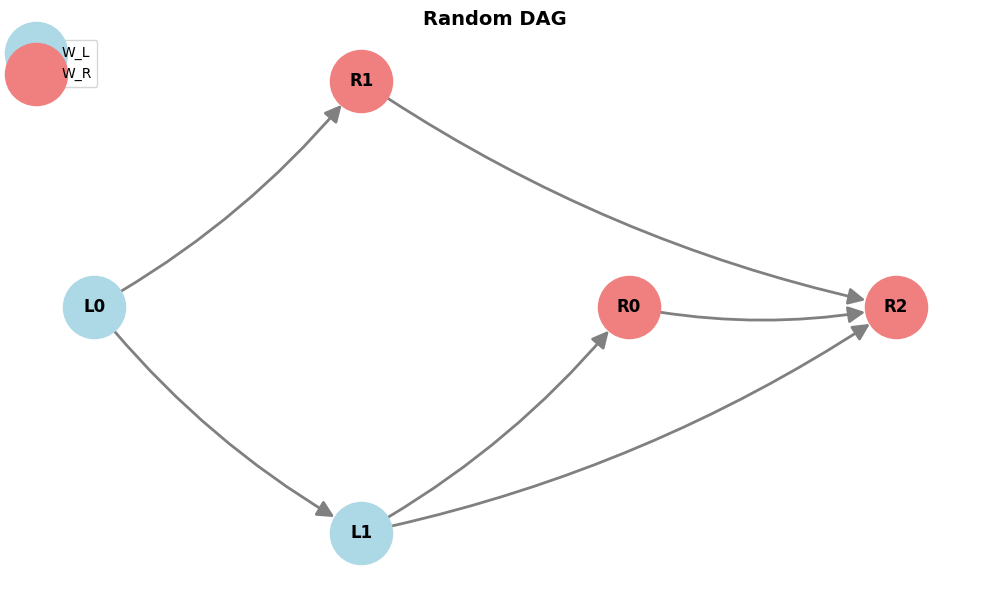


✓ DataGenerator created
✓ SCM created

Query: P(R2=1 | do(R1=1))

LP: 4096 vars, 32 constraints

Decision vector q (first 5 of 4096):
  q[0]: r_R0^1, r_R1^1, r_R2^1
  q[1]: r_R0^1, r_R1^1, r_R2^2
  q[2]: r_R0^1, r_R1^1, r_R2^3
  q[3]: r_R0^1, r_R1^1, r_R2^4
  q[4]: r_R0^1, r_R1^1, r_R2^5

LP: 4096 vars, 32 constraints

Decision vector q (first 5 of 4096):
  q[0]: r_R0^1, r_R1^1, r_R2^1
  q[1]: r_R0^1, r_R1^1, r_R2^2
  q[2]: r_R0^1, r_R1^1, r_R2^3
  q[3]: r_R0^1, r_R1^1, r_R2^4
  q[4]: r_R0^1, r_R1^1, r_R2^5


In [2]:
# ============================================================================
# COMPLETE WORKFLOW EXAMPLE
# ============================================================================

import importlib
import sys

# Force reload to avoid stale objects
if 'symbolic_bounds' in sys.modules:
    for mod in list(sys.modules.keys()):
        if mod.startswith('symbolic_bounds'):
            del sys.modules[mod]

from symbolic_bounds import DAG, DataGenerator, SCM, ProgramFactory
from symbolic_bounds.random_dag_generator import generate_random_partitioned_dag
import matplotlib.pyplot as plt

# 1. Generate random DAG
dag = generate_random_partitioned_dag(n=5, seed=42, binary_only=True)
dag.generate_all_response_types()
print(f"Generated DAG with {len(dag.get_all_nodes())} nodes")

# 2. Draw DAG
fig = dag.draw(figsize=(10, 6), title="Random DAG")
plt.show()

# 3. Create DataGenerator
generator = DataGenerator(dag, seed=123)
print(f"\n✓ DataGenerator created")

# 4. Create SCM
scm = SCM(dag, generator)
print("✓ SCM created")

# 5. Choose query: P(Y | do(X)) where Y and X are nodes in W_R
if len(dag.W_R) >= 2:
    X, Y = list(dag.W_R)[:2]
    print(f"\nQuery: P({Y.name}=1 | do({X.name}=1))")
    
    # 6. Write LP
    lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))
    
    summary = lp.get_summary()
    print(f"\nLP: {summary['n_variables']} vars, {summary['n_constraints']} constraints")
    
    # Print decision vector q
    print(f"\nDecision vector q (first 5 of {len(lp.q_labels)}):")
    for i in range(min(5, len(lp.q_labels))):
        print(f"  q[{i}]: {lp.variable_labels[i]}")
else:
    print("\nNot enough nodes in W_R")

In [3]:
dag.print_response_type_table(X)


Response types for R1 (parents: L0):

r_R1^1:
L0 | R1
-------
0 | 0
1 | 0

r_R1^2:
L0 | R1
-------
0 | 0
1 | 1

r_R1^3:
L0 | R1
-------
0 | 1
1 | 0

r_R1^4:
L0 | R1
-------
0 | 1
1 | 1



In [5]:
# Print full LP with decision vector
lp.print_lp()


LINEAR PROGRAM

minimize    α^T q

Objective vector α:
  Dimension: 4096

subject to    P q = p

Constraint matrix P:
  Shape: (32, 4096) (rows × columns)
  Rows (configurations): 32
  Columns (response types): 4096

Right-hand-side vector p (observed probabilities):
  Dimension: 32
  Sum: 1.000000 (should be 1.0)

              q ≥ 0
              1^T q = 1

Decision variable q:
  Dimension: 4096 (= ℵᴿ)
  Interpretation: Probabilities of response type combinations from W_R

